In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [19]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [20]:
X_train.shape
# 60k images of 28X28 size

(60000, 28, 28)

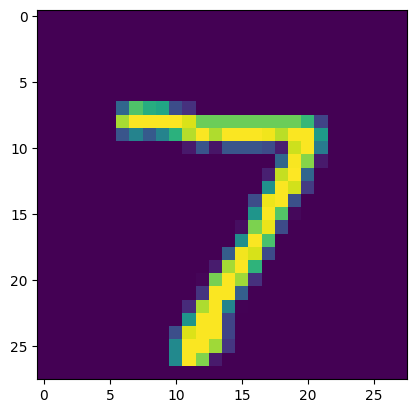

In [21]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0])

In [22]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [23]:
# to convert the above data between(0-1) divide above data by 255

X_train = X_train/255
X_test = X_test/255


In [34]:
model = Sequential()

# We need input of 784 so flatten the layer
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax' ))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])   #no need to additionally one-hot-encode

In [50]:
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0089 - accuracy: 0.9967 - val_loss: 0.1434 - val_accuracy: 0.9736
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.1522 - val_accuracy: 0.9735
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0096 - accuracy: 0.9967 - val_loss: 0.1808 - val_accuracy: 0.9733
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.1557 - val_accuracy: 0.9772
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0087 - accuracy: 0.9971 - val_loss: 0.1702 - val_accuracy: 0.9738
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.1661 - val_accuracy: 0.9744
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.1743 - val_accuracy:

In [51]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [52]:
y_pred = y_prob.argmax(axis = 1)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.9756

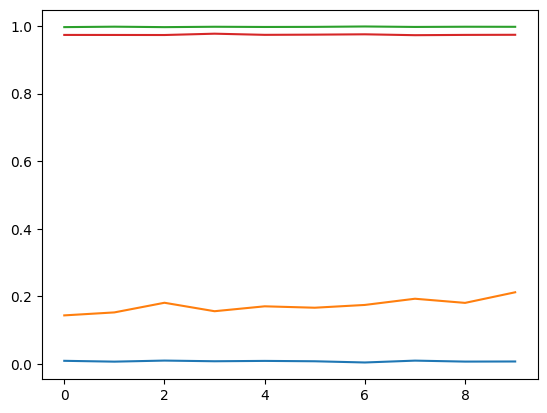

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

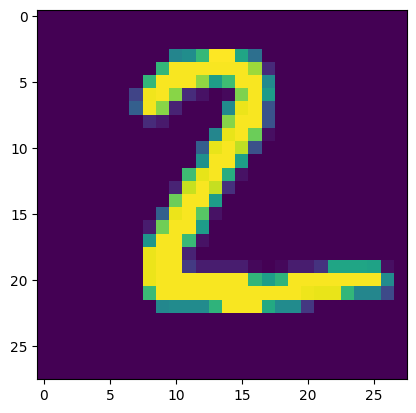

In [56]:
plt.imshow(X_test[1])

In [59]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 24ms/step


array([2])